In [20]:
##import libraries 

#dataprep
import pandas as pd 
from sklearn.model_selection import train_test_split
import numpy as np 

##keras stuff 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

#saving prediction output 
import pickle

#graphing
import matplotlib.pyplot as plt

In [21]:
image_df = pd.read_csv('./data_multi_label/full_image_df.csv')
image_df = image_df.drop(columns='Unnamed: 0')
image_df.image_saved_as = image_df.image_saved_as.apply(lambda x: x +'.png')

print (image_df.shape)

image_df.head()

(2313, 17)


,AKA,AKE,AKH,AKY,ALC,AMN,BNZ,COC,COH,COO,COONH2,KEY,OH,SHH,cid,image_saved_as,ring
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,13156,3_bromo_2_butanone_13156.png,0.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,62791,3_bromo_2_butanone_62791.png,0.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,13142,3_bromo_2_butanone_13142.png,0.0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,12413224,3_bromo_2_butanone_12413224.png,0.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,123858546,3_bromo_2_butanone_123858546.png,0.0


In [22]:
train = image_df.sample(frac = 0.80, random_state=1) # sampling with out replacement is the default

print (train.shape)

train.head()

(1850, 17)


,AKA,AKE,AKH,AKY,ALC,AMN,BNZ,COC,COH,COO,COONH2,KEY,OH,SHH,cid,image_saved_as,ring
959,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59922317,2_aminopropane_59922317.png,0.0
47,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3822501,4_picolylamine_3822501.png,1.0
1123,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,15114725,3_trimethylsilyl_ethynylbenzaldehyde_15114725.png,1.0
553,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,57616908,lysine_57616908.png,0.0
996,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,87701396,2_aminopropane_87701396.png,0.0


In [23]:
#Set a mask equal to the cid's which are in the training set that we made using pandas.sample 
mask = train['cid']

#for loop did not like the pandas.series, so I converted to a list 
mask = list(mask)


#this for loop checks the full dataframe (image_df) cid's against the ones in train
index_to_drop = []
for index, entry in enumerate(image_df['cid']):
#     print (entry)
    if entry in mask:
        index_to_drop.append(index)


# build the test dataframe by dropping the indicies which are not overlapping 
test = image_df.drop(labels=index_to_drop, axis=0)

print (test.shape)
print ('--'*25)
print (train.shape)
print ('--'*25)
print (image_df.shape)

# test.head()

(463, 17)
--------------------------------------------------
(1850, 17)
--------------------------------------------------
(2313, 17)


In [24]:
# We are going to look at a subset of features first 
features = ['AKA', 'AKE', 'ring', 'BNZ', 'image_saved_as']

#apply those feature constraints to the dataframes 
train_features = train[features]
test_features = test[features]

train_features.head()

,AKA,AKE,ring,BNZ,image_saved_as
959,1.0,0.0,0.0,0.0,2_aminopropane_59922317.png
47,1.0,0.0,1.0,1.0,4_picolylamine_3822501.png
1123,1.0,0.0,1.0,1.0,3_trimethylsilyl_ethynylbenzaldehyde_15114725.png
553,1.0,0.0,0.0,0.0,lysine_57616908.png
996,1.0,0.0,0.0,0.0,2_aminopropane_87701396.png


In [25]:
#Conver the float into into ints
train_features[["AKA", "AKE", "ring", "BNZ"]] = train_features[["AKA", "AKE", "ring", "BNZ"]].astype(int)
test_features[["AKA", "AKE", "ring", "BNZ"]] = test_features[["AKA", "AKE", "ring", "BNZ"]].astype(int)

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [26]:
train_features ['AKA']=train_features.AKA.replace(to_replace=1.0, value = 'AKA')
train_features ['AKE']=train_features.AKE.replace(to_replace=1.0, value = 'AKE')
train_features ['ring']=train_features.ring.replace(to_replace=1.0, value = 'ring')
train_features ['BNZ']=train_features.BNZ.replace(to_replace=1.0, value = 'BNZ')

test_features ['AKA']=test_features.AKA.replace(to_replace=1.0, value = 'AKA')
test_features ['AKE']=test_features.AKE.replace(to_replace=1.0, value = 'AKE')
test_features ['ring']=test_features.ring.replace(to_replace=1.0, value = 'ring')
test_features ['BNZ']=test_features.BNZ.replace(to_replace=1.0, value = 'BNZ')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

In [27]:
# using assign to make a label column, this is a req for the imagedatagen class, this is not unlike the way data must
# formatted when getting data ready for scala 

train_features = train_features.assign(label = list(train_features['AKA'].astype(str) +',' + train_features['AKE'].astype('str') + ','
                                  + train_features['ring'].astype(str) + ',' + train_features['BNZ'].astype('str')))



In [28]:
test_features = test_features.assign(label = list(test_features['AKA'].astype(str) +',' + test_features['AKE'].astype('str') + ','
                                  + test_features['ring'].astype(str) + ',' + test_features['BNZ'].astype('str')))


In [29]:
test_features.head()

,AKA,AKE,ring,BNZ,image_saved_as,label
4,AKA,0,0,0,3_bromo_2_butanone_123858546.png,"AKA,0,0,0"
7,AKA,0,0,0,3_bromo_2_butanone_14692245.png,"AKA,0,0,0"
15,AKA,0,ring,BNZ,4_picolylamine_12238842.png,"AKA,0,ring,BNZ"
20,AKA,0,ring,BNZ,4_picolylamine_12425236.png,"AKA,0,ring,BNZ"
25,AKA,0,ring,BNZ,4_picolylamine_87523068.png,"AKA,0,ring,BNZ"


In [30]:
stopwords = '0'
# words = train_features['label'][0].split(',')     
# new_entry = [word for word in words if word not in stopwords]

df_entry = []

for i in train_features['label']:
    words = i.split(',')
    new_entry = [word for word in words if word not in stopwords]
    df_entry.append(new_entry)


# print (df_entry)
train_features["label"] = df_entry


## https://stackoverflow.com/questions/29771168/how-to-remove-words-from-a-list-in-python

In [31]:
train_features.head()

,AKA,AKE,ring,BNZ,image_saved_as,label
959,AKA,0,0,0,2_aminopropane_59922317.png,[AKA]
47,AKA,0,ring,BNZ,4_picolylamine_3822501.png,"[AKA, ring, BNZ]"
1123,AKA,0,ring,BNZ,3_trimethylsilyl_ethynylbenzaldehyde_15114725.png,"[AKA, ring, BNZ]"
553,AKA,0,0,0,lysine_57616908.png,[AKA]
996,AKA,0,0,0,2_aminopropane_87701396.png,[AKA]


In [32]:
stopwords = '0'
# words = train_features['label'][0].split(',')     
# new_entry = [word for word in words if word not in stopwords]

df_entry = []

for i in test_features['label']:
    words = i.split(',')
    new_entry = [word for word in words if word not in stopwords]
    df_entry.append(new_entry)


# print (df_entry)
test_features["label"] = df_entry


## https://stackoverflow.com/questions/29771168/how-to-remove-words-from-a-list-in-python

In [33]:
test_features.head()

,AKA,AKE,ring,BNZ,image_saved_as,label
4,AKA,0,0,0,3_bromo_2_butanone_123858546.png,[AKA]
7,AKA,0,0,0,3_bromo_2_butanone_14692245.png,[AKA]
15,AKA,0,ring,BNZ,4_picolylamine_12238842.png,"[AKA, ring, BNZ]"
20,AKA,0,ring,BNZ,4_picolylamine_12425236.png,"[AKA, ring, BNZ]"
25,AKA,0,ring,BNZ,4_picolylamine_87523068.png,"[AKA, ring, BNZ]"


In [34]:
### Data is properly formatted, now we can begin with the imagedatagen class 

#Instantiate the ImageDataGenerator 

datagen = ImageDataGenerator(rotation_range=30,rescale=1./255, validation_split=0.25) # shear_range=0.2

In [35]:
# We are fitting this class

batch = 8 #updating the size

training_generator = datagen.flow_from_dataframe(
    train_features, 
    directory = './images_multi_label/',
    x_col = 'image_saved_as',
    y_col = 'label',
    subset='training',
    target_size = (300,300),
    color_mode = 'grayscale',
    class_mode = 'categorical',
    batch_size = batch,
#     drop_duplicates = False,
    save_to_dir = '/Users/patrickcavins/Desktop/augment/',
    save_format = '.png'
)

Found 1388 images belonging to 4 classes.


In [36]:
validation_generator = datagen.flow_from_dataframe(
    train_features, 
    directory = './images_multi_label/',
    x_col = 'image_saved_as',
    y_col = 'label',
    subset='validation',
    target_size = (300,300),
    color_mode = 'grayscale',
    class_mode = 'categorical',
    batch_size = batch,
#     drop_duplicates = False,
    save_to_dir = '/Users/patrickcavins/Desktop/augment/',
    save_format = '.png'
)

Found 462 images belonging to 4 classes.


In [37]:
test_datagen = ImageDataGenerator(rescale=1./255.)


test_generator=test_datagen.flow_from_dataframe(
dataframe= test_features,
directory="./images_multi_label/",
x_col="image_saved_as",
y_col='label',
batch_size=batch,
# seed=42,
shuffle=False,
class_mode='categorical',
color_mode = 'grayscale',
target_size=(300,300))

Found 463 images belonging to 4 classes.


In [38]:
model = Sequential()

#add more layers/filter because of image

model.add(Conv2D(128, (5, 5), input_shape=(300, 300, 1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))
          
model.add(Conv2D(64, (5, 5)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))
          

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.50)) # 50% 
model.add(Dense(4)) # can convert back to 4 
model.add(Activation('sigmoid'))

model.summary()          

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 296, 296, 128)     3328      
_________________________________________________________________
batch_normalization_1 (Batch (None, 296, 296, 128)     512       
_________________________________________________________________
activation_1 (Activation)    (None, 296, 296, 128)     0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 98, 98, 128)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 98, 98, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 94, 94, 64)        204864    
___________________________

In [39]:
# model.compile(optimizers.rmsprop(lr=0.0001, decay=1e-6),loss="categorical_crossentropy",metrics=["accuracy"])

##
from keras import optimizers

ad_delta = optimizers.Adadelta(lr = 0.01, rho = 0.5, decay = 0.001)

# adam = optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.00001, amsgrad=False)

model.compile(loss='binary_crossentropy', optimizer= ad_delta, metrics=['accuracy'])

In [40]:
history = model.fit_generator(generator = training_generator, 
                              steps_per_epoch= 10, 
                              epochs=10, validation_data= validation_generator, 
                                  validation_steps = 10
                                )

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
10/10 [==============================] - 52s 5s/step - loss: 1.2317 - acc: 0.5656 - val_loss: 0.6312 - val_acc: 0.6906
Epoch 2/10
10/10 [==============================] - 55s 5s/step - loss: 1.2525 - acc: 0.5812 - val_loss: 0.7008 - val_acc: 0.6281
Epoch 3/10
10/10 [==============================] - 69s 7s/step - loss: 0.9205 - acc: 0.6469 - val_loss: 0.6084 - val_acc: 0.6969
Epoch 4/10
10/10 [==============================] - 84s 8s/step - loss: 1.0374 - acc: 0.6406 - val_loss: 0.5775 - val_acc: 0.7219
Epoch 5/10
10/10 [==============================] - 96s 10s/step - loss: 0.8061 - acc: 0.6719 - val_loss: 0.6140 - val_acc: 0.6969
Epoch 6/10
10/10 [==============================] - 78s 8s/step - loss: 0.8576 - acc: 0.6500 - val_loss: 0.6138 - val_acc: 0.6859
Epoch 7/10
10/10 [==============================] - 82s 8s/step - loss: 0.9704 - acc: 0.6156 - val_loss: 0.5556 - val_acc: 0.7188
Epoch 8/10
10/10 [=======================

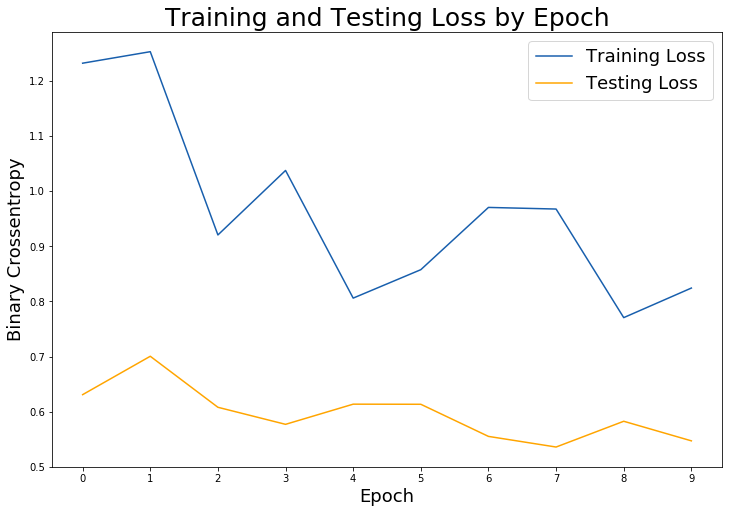

In [59]:
# Check out our train loss and test loss over epochs.
train_loss = history.history['loss']
test_loss = history.history['val_loss']

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_loss, label='Training Loss', color='#185fad')
plt.plot(test_loss, label='Testing Loss', color='orange')

# Set title
plt.title('Training and Testing Loss by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Binary Crossentropy', fontsize = 18)
plt.xticks(range(10))

plt.legend(fontsize = 18);

In [42]:
#Testing 
metric = model.evaluate_generator(validation_generator, steps=10, verbose=1)



labels = model.metrics_names


# Show model performance.
print(f'{labels[0]}: {metric[0]}')
print(f'{labels[1]}: {metric[1]}')

10/10 [==============================] - 14s 1s/step
loss: 0.5420226087936988
acc: 0.7500000015283242


In [43]:
test_generator.reset()

pred=model.predict_generator(test_generator,
steps=10,
verbose=1)

10/10 [==============================] - 12s 1s/step


In [44]:
training_generator.class_indices

{'AKA': 0, 'AKE': 1, 'BNZ': 2, 'ring': 3}

In [45]:
pred_class = (pred >= .5).astype(int)

In [46]:
pred_class

array([[1, 0, 0, 1],
       [0, 0, 1, 1],
       [0, 0, 1, 1],
       [0, 1, 1, 1],
       [0, 0, 1, 1],
       [0, 0, 1, 1],
       [0, 0, 1, 1],
       [0, 0, 1, 1],
       [0, 0, 1, 1],
       [0, 0, 1, 1],
       [0, 0, 1, 1],
       [0, 0, 1, 1],
       [0, 0, 1, 1],
       [1, 0, 1, 1],
       [1, 0, 1, 1],
       [0, 0, 1, 1],
       [0, 0, 1, 1],
       [0, 0, 1, 1],
       [1, 0, 1, 1],
       [0, 0, 1, 1],
       [1, 0, 0, 1],
       [1, 0, 0, 1],
       [1, 0, 0, 1],
       [1, 0, 0, 1],
       [1, 0, 0, 1],
       [1, 0, 0, 1],
       [1, 0, 0, 1],
       [1, 0, 0, 1],
       [0, 0, 1, 1],
       [1, 0, 0, 1],
       [1, 0, 0, 1],
       [1, 0, 1, 1],
       [0, 0, 0, 1],
       [1, 0, 0, 1],
       [0, 0, 0, 1],
       [1, 0, 0, 1],
       [1, 0, 0, 1],
       [1, 0, 1, 1],
       [1, 0, 0, 1],
       [1, 0, 0, 1],
       [1, 0, 1, 1],
       [1, 0, 1, 1],
       [0, 0, 1, 1],
       [0, 0, 0, 1],
       [1, 0, 0, 1],
       [0, 0, 1, 1],
       [1, 0, 1, 1],
       [1, 0,

In [47]:
pred

array([[0.52023363, 0.20068485, 0.16950738, 0.54035944],
       [0.4301111 , 0.1741677 , 0.60161793, 0.9243821 ],
       [0.4392947 , 0.02865246, 0.6942393 , 0.8695828 ],
       [0.25188386, 0.7074404 , 0.77644634, 0.96492374],
       [0.13943702, 0.04600376, 0.96872854, 0.8899107 ],
       [0.08869484, 0.17490017, 0.94483835, 0.9641249 ],
       [0.27333212, 0.01109377, 0.99731636, 0.9854194 ],
       [0.22875106, 0.045358  , 0.6602376 , 0.95576215],
       [0.32332742, 0.14840648, 0.957984  , 0.9576303 ],
       [0.12799722, 0.01693812, 0.98461366, 0.94243014],
       [0.2829693 , 0.00617072, 0.94716394, 0.9705893 ],
       [0.08843341, 0.02720219, 0.99298835, 0.991499  ],
       [0.07324472, 0.00790706, 0.9912721 , 0.99396133],
       [0.53636545, 0.14059943, 0.50832015, 0.7874973 ],
       [0.5082836 , 0.09326109, 0.6413901 , 0.8050197 ],
       [0.45044369, 0.10860705, 0.6784731 , 0.8459562 ],
       [0.16864103, 0.11313012, 0.613018  , 0.9284742 ],
       [0.41711438, 0.1489596 ,

In [48]:
training_generator.class_indices

{'AKA': 0, 'AKE': 1, 'BNZ': 2, 'ring': 3}

In [58]:
# https://stackoverflow.com/questions/50988050/cnn-training-accuracy-is-1-0-and-validation-accuracy-is-1-0-prediction-return


import numpy as np
from keras.preprocessing import image


test_image = image.load_img('/Users/patrickcavins/Downloads/imgsrv.fcgi.png', grayscale = True, target_size = (300, 300,1))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
# training_generator.class_indices
# if result[0][0] == 1:
#     prediction = 'Yes'
# else:
#     prediction = 'No'

result

/anaconda3/lib/python3.6/site-packages/keras_preprocessing/image/utils.py:98: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


array([[1., 0., 1., 1.]], dtype=float32)

In [50]:
pred_val=model.predict_generator(validation_generator,
steps=10,
verbose=1)

10/10 [==============================] - 13s 1s/step


In [51]:
pred_val

array([[0.43673146, 0.07598215, 0.6747459 , 0.69953054],
       [0.51979357, 0.04494697, 0.91767144, 0.8881172 ],
       [0.31095693, 0.02373087, 0.619141  , 0.7440839 ],
       [0.53395575, 0.06749114, 0.90697664, 0.9390702 ],
       [0.5394698 , 0.12946945, 0.8676497 , 0.84023637],
       [0.56706685, 0.11570516, 0.79946136, 0.9316281 ],
       [0.37904564, 0.1750069 , 0.25747436, 0.6886705 ],
       [0.48311055, 0.2408621 , 0.58904815, 0.68113893],
       [0.6119205 , 0.17814478, 0.32921463, 0.7918418 ],
       [0.45666823, 0.06246379, 0.8589449 , 0.95375365],
       [0.6859759 , 0.05577159, 0.9006977 , 0.95755816],
       [0.37676018, 0.4537007 , 0.5199839 , 0.8750324 ],
       [0.5213136 , 0.01250732, 0.8073994 , 0.8529053 ],
       [0.6204481 , 0.15752968, 0.33880767, 0.5410076 ],
       [0.20609084, 0.03829834, 0.40406007, 0.5863719 ],
       [0.8861568 , 0.0921891 , 0.41562754, 0.82420564],
       [0.26881045, 0.05541939, 0.9016033 , 0.952026  ],
       [0.7878692 , 0.10277852,

In [52]:
(pred_val >= .5).astype(int)

array([[0, 0, 1, 1],
       [1, 0, 1, 1],
       [0, 0, 1, 1],
       [1, 0, 1, 1],
       [1, 0, 1, 1],
       [1, 0, 1, 1],
       [0, 0, 0, 1],
       [0, 0, 1, 1],
       [1, 0, 0, 1],
       [0, 0, 1, 1],
       [1, 0, 1, 1],
       [0, 0, 1, 1],
       [1, 0, 1, 1],
       [1, 0, 0, 1],
       [0, 0, 0, 1],
       [1, 0, 0, 1],
       [0, 0, 1, 1],
       [1, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 0, 1, 1],
       [0, 0, 1, 1],
       [0, 0, 1, 1],
       [1, 0, 1, 0],
       [1, 0, 0, 1],
       [1, 0, 1, 1],
       [0, 0, 1, 1],
       [1, 0, 1, 1],
       [0, 0, 1, 1],
       [1, 0, 0, 1],
       [0, 0, 1, 1],
       [0, 0, 1, 1],
       [0, 0, 1, 1],
       [1, 0, 1, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 1, 1],
       [0, 0, 1, 1],
       [0, 0, 1, 1],
       [1, 0, 0, 1],
       [0, 0, 0, 1],
       [1, 0, 1, 1],
       [1, 0, 1, 1],
       [1, 0, 1, 1],
       [1, 0, 0, 1],
       [0, 0, 1, 1],
       [0, 0, 1, 1],
       [1, 0, 1, 1],
       [1, 0,

In [ ]:
## adding batch normalization to see if the model perform better 